In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("F:\\customerchurn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [7]:
df[df.TotalCharges.isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
df1=df[df.TotalCharges.isnull()==False]

In [9]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [10]:
df1.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

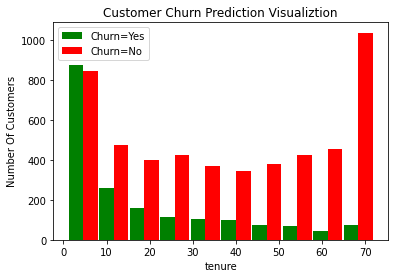

In [11]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

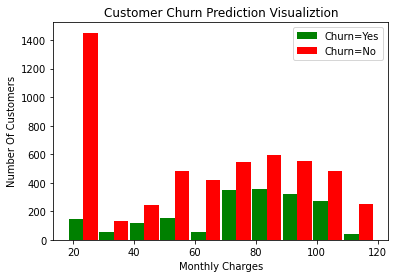

In [12]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [13]:
def print_unique_col_values(df):
       for column in df:
#             if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [14]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [15]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_21588\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Yash\AppData\Local\Temp\ipykernel_21588\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [16]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [17]:
df1.replace('No',0,inplace=True)
df1.replace('Yes',1,inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_21588\1580348880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No',0,inplace=True)
C:\Users\Yash\AppData\Local\Temp\ipykernel_21588\1580348880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('Yes',1,inplace=True)


In [18]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [19]:
df1.gender.replace({'Female':1,'Male':0},inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_21588\3822423156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.gender.replace({'Female':1,'Male':0},inplace=True)


In [20]:
print_unique_col_values(df1)

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [21]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [23]:
cols2scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols2scale]=scaler.fit_transform(df2[cols2scale])

In [24]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [25]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [27]:
X_train.shape

(5625, 26)

In [28]:
X_test.shape

(1407, 26)

In [29]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [47]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model = keras.Sequential([
     keras.layers.Dense(20, input_shape=(26,), activation='relu'),
     keras.layers.Dense(15, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')])
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    if weights==-1:
         model.fit(X_train,y_train,epochs=100)
    else:
         model.fit(X_train,y_train,epochs=100,class_weight=weights)
            
    print(model.evaluate(X_test, y_test))
    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)
    
    print('Classification Report : \n',classification_report(y_test,y_pred))
    
    return y_pred



# M1- Undersampling

In [66]:
count_class_0, count_class_1 =df2.Churn.value_counts()
print(count_class_0)
print(count_class_1)

5163
1869


In [35]:
df_class_0=df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn'] == 1]

In [43]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())
print(df_test_under.shape)

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64
(3738, 27)


In [37]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [45]:
print(y_test.value_counts())
print(y_train.value_counts())

1    374
0    374
Name: Churn, dtype: int64
0    1495
1    1495
Name: Churn, dtype: int64


In [48]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6532 - accuracy: 0.6211
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7498
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.7609
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7666
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7656
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7716
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7753
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7756
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7813
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7809
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8080
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8020
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8077
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8100
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8114
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8097
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8100
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8104
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8134
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8070
Epoch 93/100


# M2- Oversampling

In [53]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_class_over=pd.concat([df_class_0,df_class_1_over],axis='rows')

print('Random over-sampling:')
print(df_class_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [54]:
X = df_class_over.drop('Churn',axis='columns')
y = df_class_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5377 - accuracy: 0.7391
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4882 - accuracy: 0.7679
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7713
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7742
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4721 - accuracy: 0.7734
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4677 - accuracy: 0.7782
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4661 - accuracy: 0.7782
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4626 - accuracy: 0.7806
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4611 - accuracy: 0.7879
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4585 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8255
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8228
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8275
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8249
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8246
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8289
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8260
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3893 - accuracy: 0.8272
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8277
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 

# M3-SMOTE (Synthetic Minority Oversampling Technique)

In [56]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [57]:
pip install imbalanced-learn


     -------------------------------------- 226.0/226.0 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0

[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [63]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [64]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [65]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5228 - accuracy: 0.7493
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7743
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7795
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7812
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.7832
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4496 - accuracy: 0.7863
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4459 - accuracy: 0.7898
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4428 - accuracy: 0.7867
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4398 - accuracy: 0.7933
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4383 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.3578 - accuracy: 0.8462
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8426
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3567 - accuracy: 0.8415
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3563 - accuracy: 0.8426
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3549 - accuracy: 0.8432
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3533 - accuracy: 0.8436
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8402
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3540 - accuracy: 0.8409
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.8448
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 

# M4- Ensemble with undersampling

In [67]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [69]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [71]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [72]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [73]:
X_train, y_train = get_train_batch(df_class_0, df_class_1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
106/106 [==============================] - 1s 2ms/step - loss: 0.6221 - accuracy: 0.6798
Epoch 2/100
106/106 [==============================] - 0s 2ms/step - loss: 0.5134 - accuracy: 0.7625
Epoch 3/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7672
Epoch 4/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7717
Epoch 5/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7726
Epoch 6/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7705
Epoch 7/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7720
Epoch 8/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7794
Epoch 9/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.7765
Epoch 10/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4670 - accura

106/106 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8142
Epoch 82/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8106
Epoch 83/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8121
Epoch 84/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8157
Epoch 85/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8142
Epoch 86/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8172
Epoch 87/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8169
Epoch 88/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8169
Epoch 89/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8127
Epoch 90/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 

In [74]:
X_train, y_train = get_train_batch(df_class_0, df_class_1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
106/106 [==============================] - 1s 2ms/step - loss: 0.5969 - accuracy: 0.6894
Epoch 2/100
106/106 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7586
Epoch 3/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7643
Epoch 4/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7696
Epoch 5/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7666
Epoch 6/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7696
Epoch 7/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7675
Epoch 8/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7666
Epoch 9/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7678
Epoch 10/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4761 - accura

106/106 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8083
Epoch 82/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8062
Epoch 83/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8056
Epoch 84/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8056
Epoch 85/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8086
Epoch 86/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8080
Epoch 87/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8053
Epoch 88/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8109
Epoch 89/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8109
Epoch 90/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 

In [75]:
X_train, y_train = get_train_batch(df_class_0, df_class_1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
95/95 [==============================] - 1s 2ms/step - loss: 0.5955 - accuracy: 0.6820
Epoch 2/100
95/95 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7650
Epoch 3/100
95/95 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7760
Epoch 4/100
95/95 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7810
Epoch 5/100
95/95 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7793
Epoch 6/100
95/95 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7873
Epoch 7/100
95/95 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.7856
Epoch 8/100
95/95 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7830
Epoch 9/100
95/95 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.7813
Epoch 10/100
95/95 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7863
Epoch 11/

95/95 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8229
Epoch 84/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8225
Epoch 85/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8232
Epoch 86/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8229
Epoch 87/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8202
Epoch 88/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8205
Epoch 89/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8252
Epoch 90/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8269
Epoch 91/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8252
Epoch 92/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8275
Epoch 93/100


In [76]:
len(y_pred1)

1407

In [77]:
len(y_test)

1407

In [78]:
y_pred_final =[]
for i in range(len(y_test)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)

In [79]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1033
           1       0.51      0.87      0.64       374

    accuracy                           0.74      1407
   macro avg       0.72      0.78      0.72      1407
weighted avg       0.82      0.74      0.76      1407

